In [1]:
import os

import subprocess
import time

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd

from utils import load_data,plot_roc

#work_dir='/nagyvinyok/adat84/sotejedlik/ribli/mhc'
work_dir='/mnt/Data1/ribli/mhc/'
os.chdir(work_dir)

Using Theano backend.
/mnt/Data1/ribli/tools/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [2]:
x,y=load_data(hla_representation='one-hot',seq_representation='one-hot')

Reading from file...
Creating representation...
Using  83751 data points
Done, It took: 1.96047711372 s


In [11]:
from sklearn.cross_validation import cross_val_predict
from sklearn.linear_model import LogisticRegression

class proba_logreg(LogisticRegression):
    def predict(self, X):
        return LogisticRegression.predict_proba(self, X)
    
model=proba_logreg(n_jobs=8)
y_pred=cross_val_predict(model,x,y,cv=5)[:,1]

AUC: 0.723532863352


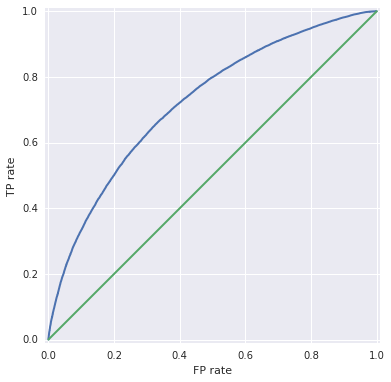

In [12]:
plot_roc(y,y_pred)